In [78]:
from  fiona import listlayers

mexicoMapsLink='https://github.com/AlphaTeamP/MEXICO/raw/main/maps/mexicoMaps_6362.gpkg'

#layers in maps
listlayers(mexicoMapsLink)

['country', 'cities', 'rivers', 'centroid', 'airports']

In [79]:
import geopandas as gpd

airports=gpd.read_file(mexicoMapsLink,layer='airports')
rivers=gpd.read_file(mexicoMapsLink,layer='rivers')
cities=gpd.read_file(mexicoMapsLink,layer='cities')

In [80]:
import pandas as pd 

portsFileLink="https://github.com/CienciaDeDatosEspacial/GeoDataFrame_Analytics/raw/main/data/UpdatedPub150.csv"
infoseaports=pd.read_csv(portsFileLink)

#columns available (so many)
infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Manage

In [81]:
#EJERCISIO 1

In [82]:

#rename
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
#keep few columns
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

# we have now
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3739 non-null   object 
 1   Country Code  3739 non-null   object 
 2   Latitude      3739 non-null   float64
 3   Longitude     3739 non-null   float64
dtypes: float64(2), object(2)
memory usage: 117.0+ KB


In [83]:
# some rows
infoseaports.head()

,portName,Country Code,Latitude,Longitude
0,Maurer,United States,40.533333,-74.250000
1,Mangkasa Oil Terminal,Indonesia,-2.733333,121.066667
2,Iharana,Madagascar,-13.350000,50.000000
3,Andoany,Madagascar,-13.400000,48.300000
4,Chake Chake,Tanzania,-5.250000,39.766667


In [84]:
# some rows
infoseaports.head()

,portName,Country Code,Latitude,Longitude
0,Maurer,United States,40.533333,-74.250000
1,Mangkasa Oil Terminal,Indonesia,-2.733333,121.066667
2,Iharana,Madagascar,-13.350000,50.000000
3,Andoany,Madagascar,-13.400000,48.300000
4,Chake Chake,Tanzania,-5.250000,39.766667


In [85]:
#spatial points (unprojected)
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude), 
                          crs=4326)# notice it is unprojected

# keep Brazil
seaports_mx=seaports[seaports['Country Code']=='Mexico'].copy()

# reset indexes
seaports_mx.reset_index(drop=True, inplace=True)

# reprojecting
seaports_mx_6362=seaports_mx.to_crs(6362) # projected crs

<Axes: >

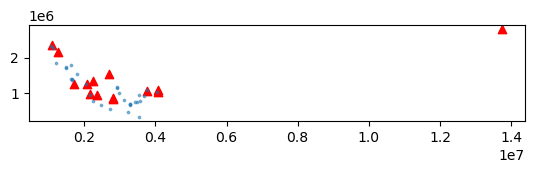

In [86]:
# subsetting
largeAirports=airports[airports['kind']=='large_airport'] #can't use "airports.type"
largeAirports.reset_index(drop=True, inplace=True)

#plotting
base=largeAirports.plot(color='red',marker="^")
seaports_mx_6362.plot(ax=base,alpha=0.5,markersize=3)

In [87]:
seaports_mx_6362.head()

,portName,Country Code,Latitude,Longitude,geometry
0,San Juan De La Costa,Mexico,24.400000,-110.700000,POINT (1622766.872 1400102.095)
1,Ensenada,Mexico,31.866667,-116.633333,POINT (1110312.055 2270684.066)
2,Nanchital,Mexico,18.066667,-94.416667,POINT (3301657.436 696363.442)
3,Puerto Madero,Mexico,14.700000,-92.450000,POINT (3534131.970 336173.831)
4,Salina Cruz,Mexico,16.166667,-95.200000,POINT (3228888.129 482014.432)


In [88]:
largeAirports.head()

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Aeropuerto Internacional de Cancún,large_airport,21.039444,-86.874304,22.0,Quintana Roo,Cancún,POINT (4062225.264 1085731.082)
1,Aeropuerto Internacional Lic. Benito Juárez,large_airport,19.435433,-99.082432,7316.0,Ciudad de México,Ciudad de México,POINT (2805471.814 829477.337)
2,Aeropuerto Internacional Lic. Gustavo Díaz Ordaz,large_airport,20.679746,-105.246685,23.0,Jalisco,Ciudad de Puerto Vallarta,POINT (2163181.807 967437.227)
3,Aeropuerto Internacional de Los Cabos,large_airport,23.151919,-109.720731,374.0,Baja California Sur,San José del Cabo,POINT (1714008.956 1257166.378)
4,Aeropuerto Internacional Miguel Hidalgo,large_airport,20.523342,-103.310108,5016.0,Jalisco,Guadalajara,POINT (2363919.298 947002.294)


In [89]:
# distance between 'Guarulhos' and 'Dtse / Gegua Oil Terminal' 
largeAirports.iloc[0].geometry.distance(seaports_mx_6362.iloc[0].geometry)/1000  # in km

2459.631350272153

In [90]:
#try 1: default
seaports_mx_6362.geometry.apply\
(lambda g: largeAirports.geometry.distance(g)/1000)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2459.631350,1313.165486,692.276815,169.575166,868.680809,1073.699806,2182.108815,2468.130092,1090.664128,469.835662,827.514342,623.450019,1303.845072,12200.964513
1,3180.865475,2225.004145,1675.406529,1179.689812,1823.092031,1745.210611,2933.377257,3203.433830,82.468662,1402.826290,202.968426,1463.119749,2207.654646,12644.209283
2,854.441677,513.730942,1170.302421,1683.783724,970.655783,1031.878621,589.603434,829.736894,2764.531771,1351.615420,2495.281292,1241.150998,518.356258,10650.976350
3,916.907083,879.939755,1509.303755,2039.871333,1320.041328,1459.982865,750.389598,869.949549,3169.780622,1726.105345,2898.368371,1638.211809,894.750912,10501.655392
4,1029.040609,547.733371,1171.053054,1701.681359,982.030951,1175.923088,786.140860,996.137744,2842.542648,1390.249619,2570.196480,1309.980182,565.512675,10766.356253
5,2421.726620,1273.347305,653.644742,137.616782,829.118772,1040.074653,2143.804720,2429.946971,1123.338051,430.220537,858.395871,586.195932,1264.026910,12167.072562
6,538.996937,745.635336,1379.369738,1855.051505,1178.429198,1033.611211,255.400535,526.928113,2830.429819,1506.779974,2569.618750,1359.347048,736.060499,10368.129594
7,3239.044053,2293.179293,1746.210064,1250.889828,1893.081179,1805.856584,2993.492305,3262.290991,23.215673,1472.941982,270.623064,1530.927251,2275.560351,12680.124888
8,289.920944,1000.002423,1613.404825,2065.493339,1415.120405,1169.937606,38.571533,295.935119,2969.233835,1713.920670,2716.202288,1550.546230,986.912825,10117.071097
9,2310.188775,1226.619732,667.253529,277.687255,810.518397,895.165191,2038.711967,2322.310947,1088.140642,390.035433,814.807931,483.774880,1212.528590,12017.392419


In [91]:
# try 2: see names (change indexes)

seaports_mx_6362.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000)

name,Aeropuerto Internacional de Cancún,Aeropuerto Internacional Lic. Benito Juárez,Aeropuerto Internacional Lic. Gustavo Díaz Ordaz,Aeropuerto Internacional de Los Cabos,Aeropuerto Internacional Miguel Hidalgo,Monterrey International Airport,Aeropuerto Internacional Manuel Crescencio Rejón,Aeropuerto Internacional de Cozumel,Aeropuerto Internacional Gral. Abelardo Rodriguez,General Rafael Buelna International Airport,Aeropuerto Internacional San Felipe,"Aeropuerto Internacional Gral, Guadalupe Victoria",Aeropuerto Internacional General Felipe Ángeles,(Duplicate)Aeropuerto Internacional Gral. Alberto Salinas Carranza
portName,,,,,,,,,,,,,,
San Juan De La Costa,2459.631350,1313.165486,692.276815,169.575166,868.680809,1073.699806,2182.108815,2468.130092,1090.664128,469.835662,827.514342,623.450019,1303.845072,12200.964513
Ensenada,3180.865475,2225.004145,1675.406529,1179.689812,1823.092031,1745.210611,2933.377257,3203.433830,82.468662,1402.826290,202.968426,1463.119749,2207.654646,12644.209283
Nanchital,854.441677,513.730942,1170.302421,1683.783724,970.655783,1031.878621,589.603434,829.736894,2764.531771,1351.615420,2495.281292,1241.150998,518.356258,10650.976350
Puerto Madero,916.907083,879.939755,1509.303755,2039.871333,1320.041328,1459.982865,750.389598,869.949549,3169.780622,1726.105345,2898.368371,1638.211809,894.750912,10501.655392
Salina Cruz,1029.040609,547.733371,1171.053054,1701.681359,982.030951,1175.923088,786.140860,996.137744,2842.542648,1390.249619,2570.196480,1309.980182,565.512675,10766.356253
Pichilingue,2421.726620,1273.347305,653.644742,137.616782,829.118772,1040.074653,2143.804720,2429.946971,1123.338051,430.220537,858.395871,586.195932,1264.026910,12167.072562
Cayo Arcas Terminal,538.996937,745.635336,1379.369738,1855.051505,1178.429198,1033.611211,255.400535,526.928113,2830.429819,1506.779974,2569.618750,1359.347048,736.060499,10368.129594
Rosarito,3239.044053,2293.179293,1746.210064,1250.889828,1893.081179,1805.856584,2993.492305,3262.290991,23.215673,1472.941982,270.623064,1530.927251,2275.560351,12680.124888
Progreso,289.920944,1000.002423,1613.404825,2065.493339,1415.120405,1169.937606,38.571533,295.935119,2969.233835,1713.920670,2716.202288,1550.546230,986.912825,10117.071097


In [92]:
#try 3: reorder previous output

seaports_mx_6362.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

name,(Duplicate)Aeropuerto Internacional Gral. Alberto Salinas Carranza,Aeropuerto Internacional General Felipe Ángeles,"Aeropuerto Internacional Gral, Guadalupe Victoria",Aeropuerto Internacional Gral. Abelardo Rodriguez,Aeropuerto Internacional Lic. Benito Juárez,Aeropuerto Internacional Lic. Gustavo Díaz Ordaz,Aeropuerto Internacional Manuel Crescencio Rejón,Aeropuerto Internacional Miguel Hidalgo,Aeropuerto Internacional San Felipe,Aeropuerto Internacional de Cancún,Aeropuerto Internacional de Cozumel,Aeropuerto Internacional de Los Cabos,General Rafael Buelna International Airport,Monterrey International Airport
portName,,,,,,,,,,,,,,
Acapulco,11251.194576,333.091078,934.229855,2436.953591,299.686437,701.096131,1169.860181,539.548143,2163.261259,1447.671526,1427.058722,1234.657733,959.542103,985.082999
Altamira,10940.593794,326.350438,703.571067,2185.480924,359.403076,787.671226,859.977183,602.995418,1920.871998,1140.476352,1146.549307,1213.989654,862.284620,428.797200
Campeche,10223.279494,885.104175,1511.365757,2974.297806,893.093424,1531.544836,150.946308,1330.344491,2715.071077,403.896260,383.921184,2008.512254,1660.111532,1174.016600
Cayo Arcas Terminal,10368.129594,736.060499,1359.347048,2830.429819,745.635336,1379.369738,255.400535,1178.429198,2569.618750,538.996937,526.928113,1855.051505,1506.779974,1033.611211
Ciudad Del Carmen,10375.850071,760.707537,1440.212121,2937.808278,762.853192,1416.298033,342.625127,1214.663089,2673.280480,584.878290,556.371997,1914.004365,1571.962002,1155.056189
Coatzacoalcos,10649.643707,515.013143,1235.946633,2758.648794,510.951639,1167.730956,584.581782,967.849173,2489.534207,850.723854,826.559483,1680.281649,1347.470525,1024.198471
Dos Bocas Terminal,10519.808085,626.502711,1326.295763,2837.815915,626.265549,1282.309151,462.686501,1081.183062,2570.846658,722.267399,696.819365,1787.120244,1448.947328,1074.942552
Ensenada,12644.209283,2207.654646,1463.119749,82.468662,2225.004145,1675.406529,2933.377257,1823.092031,202.968426,3180.865475,3203.433830,1179.689812,1402.826290,1745.210611
Frontera,10459.120448,682.048655,1372.686345,2878.398171,683.005653,1337.992517,409.323891,1136.577803,2612.461881,663.509060,637.042067,1839.584161,1499.555529,1105.838376


In [93]:
distanceMatrixKM_sea_air= seaports_mx_6362.set_index('portName').geometry.apply\
                          (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

In [94]:
# the mean distance from a seaport to all the large airports (sorted)
distanceMatrixKM_sea_air.mean(axis=1).sort_values(ascending=True) #axis=0?

portName
Tampico                  1676.351127
Altamira                 1677.072304
Tuxpan                   1699.557744
Puerto Vallarta          1708.703313
Mazatlan                 1710.617585
Manzanillo               1759.323384
Lazaro Cardenas          1784.946616
Veracruz                 1792.414641
Acapulco                 1848.781024
Topolobampo              1896.795406
Coatzacoalcos            1900.652430
Nanchital                1904.717542
Minatitlan               1906.999669
Cayo Arcas Terminal      1920.270590
Dos Bocas Terminal       1933.129306
Frontera                 1951.224611
La Paz                   1952.123224
Pichilingue              1954.180745
Ciudad Del Carmen        1979.040769
San Juan De La Costa     1981.681577
Salina Cruz              1988.184207
Campeche                 1988.964657
Progreso                 1995.876653
Guaymas                  2073.710867
Isla San Marcos          2124.772720
Santa Rosalia            2140.310554
San Miguel De Cozumel    2159

In [95]:
SomeStats=pd.DataFrame()
SomeStats['mean']=distanceMatrixKM_sea_air.mean(axis=1)
SomeStats['min']=distanceMatrixKM_sea_air.min(axis=1)
SomeStats['max']=distanceMatrixKM_sea_air.max(axis=1)

# see some
SomeStats.head(10)

,mean,min,max
portName,,,
Acapulco,1848.781024,299.686437,11251.194576
Altamira,1677.072304,326.350438,10940.593794
Campeche,1988.964657,150.946308,10223.279494
Cayo Arcas Terminal,1920.270590,255.400535,10368.129594
Ciudad Del Carmen,1979.040769,342.625127,10375.850071
Coatzacoalcos,1900.652430,510.951639,10649.643707
Dos Bocas Terminal,1933.129306,462.686501,10519.808085
Ensenada,2569.237625,82.468662,12644.209283
Frontera,1951.224611,409.323891,10459.120448


In [96]:
# farthest airport to each seaport
distanceMatrixKM_sea_air.idxmax(axis=1)

portName
Acapulco                 (Duplicate)Aeropuerto Internacional Gral. Albe...
Altamira                 (Duplicate)Aeropuerto Internacional Gral. Albe...
Campeche                 (Duplicate)Aeropuerto Internacional Gral. Albe...
Cayo Arcas Terminal      (Duplicate)Aeropuerto Internacional Gral. Albe...
Ciudad Del Carmen        (Duplicate)Aeropuerto Internacional Gral. Albe...
Coatzacoalcos            (Duplicate)Aeropuerto Internacional Gral. Albe...
Dos Bocas Terminal       (Duplicate)Aeropuerto Internacional Gral. Albe...
Ensenada                 (Duplicate)Aeropuerto Internacional Gral. Albe...
Frontera                 (Duplicate)Aeropuerto Internacional Gral. Albe...
Guaymas                  (Duplicate)Aeropuerto Internacional Gral. Albe...
Isla San Marcos          (Duplicate)Aeropuerto Internacional Gral. Albe...
La Paz                   (Duplicate)Aeropuerto Internacional Gral. Albe...
Lazaro Cardenas          (Duplicate)Aeropuerto Internacional Gral. Albe...
Manzanillo      

In [97]:
# farthest seaport to each airport
distanceMatrixKM_sea_air.idxmax(axis=0)

name
(Duplicate)Aeropuerto Internacional Gral. Alberto Salinas Carranza                 Rosarito
Aeropuerto Internacional General Felipe Ángeles                                    Rosarito
Aeropuerto Internacional Gral, Guadalupe Victoria                     San Miguel De Cozumel
Aeropuerto Internacional Gral. Abelardo Rodriguez                     San Miguel De Cozumel
Aeropuerto Internacional Lic. Benito Juárez                                        Rosarito
Aeropuerto Internacional Lic. Gustavo Díaz Ordaz                      San Miguel De Cozumel
Aeropuerto Internacional Manuel Crescencio Rejón                                   Rosarito
Aeropuerto Internacional Miguel Hidalgo                                            Rosarito
Aeropuerto Internacional San Felipe                                   San Miguel De Cozumel
Aeropuerto Internacional de Cancún                                                 Rosarito
Aeropuerto Internacional de Cozumel                                        

In [98]:
# closest airport to each seaport
distanceMatrixKM_sea_air.idxmin(axis=1)

portName
Acapulco                       Aeropuerto Internacional Lic. Benito Juárez
Altamira                   Aeropuerto Internacional General Felipe Ángeles
Campeche                  Aeropuerto Internacional Manuel Crescencio Rejón
Cayo Arcas Terminal       Aeropuerto Internacional Manuel Crescencio Rejón
Ciudad Del Carmen         Aeropuerto Internacional Manuel Crescencio Rejón
Coatzacoalcos                  Aeropuerto Internacional Lic. Benito Juárez
Dos Bocas Terminal        Aeropuerto Internacional Manuel Crescencio Rejón
Ensenada                 Aeropuerto Internacional Gral. Abelardo Rodriguez
Frontera                  Aeropuerto Internacional Manuel Crescencio Rejón
Guaymas                                Aeropuerto Internacional San Felipe
Isla San Marcos                        Aeropuerto Internacional San Felipe
La Paz                               Aeropuerto Internacional de Los Cabos
Lazaro Cardenas                    Aeropuerto Internacional Miguel Hidalgo
Manzanillo      

In [99]:
# closest seaport to each airport
distanceMatrixKM_sea_air.idxmin(axis=0)

name
(Duplicate)Aeropuerto Internacional Gral. Alberto Salinas Carranza    San Miguel De Cozumel
Aeropuerto Internacional General Felipe Ángeles                                      Tuxpan
Aeropuerto Internacional Gral, Guadalupe Victoria                                  Mazatlan
Aeropuerto Internacional Gral. Abelardo Rodriguez                                  Rosarito
Aeropuerto Internacional Lic. Benito Juárez                                          Tuxpan
Aeropuerto Internacional Lic. Gustavo Díaz Ordaz                            Puerto Vallarta
Aeropuerto Internacional Manuel Crescencio Rejón                                   Progreso
Aeropuerto Internacional Miguel Hidalgo                                          Manzanillo
Aeropuerto Internacional San Felipe                                                Ensenada
Aeropuerto Internacional de Cancún                                    San Miguel De Cozumel
Aeropuerto Internacional de Cozumel                                   San M

In [100]:
#EJERCISIO 2

In [101]:

rivers.head()

,NAME,SYSTEM,geometry
0,"Rio Grande, North America",None,"MULTILINESTRING ((2984008.845 1542559.030, 297..."
1,Colorado,None,"LINESTRING (1297285.618 2321381.973, 1272813.0..."


In [102]:
#keep one:

rivers[rivers.NAME.str.contains('Colorado')]

,NAME,SYSTEM,geometry
1,Colorado,None,"LINESTRING (1297285.618 2321381.973, 1272813.0..."


In [103]:
# distance from each airport to Rio Grande
rivers[rivers.NAME.str.contains('Colorado')].iloc[0].geometry.distance(largeAirports.set_index('name').geometry)/1000

name
Aeropuerto Internacional de Cancún                                     2997.832960
Aeropuerto Internacional Lic. Benito Juárez                            2069.632236
Aeropuerto Internacional Lic. Gustavo Díaz Ordaz                       1545.451510
Aeropuerto Internacional de Los Cabos                                  1074.926209
Aeropuerto Internacional Miguel Hidalgo                                1681.773409
Monterrey International Airport                                        1566.194039
Aeropuerto Internacional Manuel Crescencio Rejón                       2753.219019
Aeropuerto Internacional de Cozumel                                    3021.324241
Aeropuerto Internacional Gral. Abelardo Rodriguez                       193.750135
General Rafael Buelna International Airport                            1264.211575
Aeropuerto Internacional San Felipe                                     101.608527
Aeropuerto Internacional Gral, Guadalupe Victoria                      1306.981812

In [104]:
distanceMatrixKM_riv_air=rivers.set_index('NAME').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

name,(Duplicate)Aeropuerto Internacional Gral. Alberto Salinas Carranza,Aeropuerto Internacional General Felipe Ángeles,"Aeropuerto Internacional Gral, Guadalupe Victoria",Aeropuerto Internacional Gral. Abelardo Rodriguez,Aeropuerto Internacional Lic. Benito Juárez,Aeropuerto Internacional Lic. Gustavo Díaz Ordaz,Aeropuerto Internacional Manuel Crescencio Rejón,Aeropuerto Internacional Miguel Hidalgo,Aeropuerto Internacional San Felipe,Aeropuerto Internacional de Cancún,Aeropuerto Internacional de Cozumel,Aeropuerto Internacional de Los Cabos,General Rafael Buelna International Airport,Monterrey International Airport
NAME,,,,,,,,,,,,,,
Colorado,12455.364103,2050.839209,1306.981812,193.750135,2069.632236,1545.451510,2753.219019,1681.773409,101.608527,2997.832960,3021.324241,1074.926209,1264.211575,1566.194039
"Rio Grande, North America",10832.372016,699.687775,560.612394,1090.460850,733.346744,940.960802,934.547099,810.512755,878.397459,1171.000607,1195.345733,918.311564,720.842709,207.750410


In [105]:
distanceMatrixKM_riv_air.loc['Colorado'].sort_values()

name
Aeropuerto Internacional San Felipe                                     101.608527
Aeropuerto Internacional Gral. Abelardo Rodriguez                       193.750135
Aeropuerto Internacional de Los Cabos                                  1074.926209
General Rafael Buelna International Airport                            1264.211575
Aeropuerto Internacional Gral, Guadalupe Victoria                      1306.981812
Aeropuerto Internacional Lic. Gustavo Díaz Ordaz                       1545.451510
Monterrey International Airport                                        1566.194039
Aeropuerto Internacional Miguel Hidalgo                                1681.773409
Aeropuerto Internacional General Felipe Ángeles                        2050.839209
Aeropuerto Internacional Lic. Benito Juárez                            2069.632236
Aeropuerto Internacional Manuel Crescencio Rejón                       2753.219019
Aeropuerto Internacional de Cancún                                     2997.832960

In [106]:
base=largeAirports.explore(color='red',marker_kwds=dict(radius=10))
rivers[rivers.NAME.str.contains('Colorado')].explore(m=base)

In [107]:
rivers[~rivers.SYSTEM.isna()]

,NAME,SYSTEM,geometry


In [108]:
systems=rivers.dissolve(by='SYSTEM')
systems

,geometry,NAME
SYSTEM,,


In [109]:
# format the GDF:

systems.reset_index(drop=False,inplace=True)
systems.drop(columns='NAME',inplace=True)

# we have
systems

,SYSTEM,geometry


In [110]:
distanceMatrixKM_sys_air=systems.set_index('SYSTEM').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=0)

distanceMatrixKM_sys_air

GeoSeries([], Name: geometry, dtype: geometry)

In [111]:
mins=distanceMatrixKM_sys_air.idxmin(axis="columns") 
mins

ValueError: No axis named columns for object type GeoSeries

In [112]:
# one of them
mins.iloc[0]

NameError: name 'mins' is not defined

In [113]:
base=systems.explore()
# the closest
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
# NOT the closest
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

ValueError: Location values cannot contain NaNs.

In [114]:
#EJERCISIO 3

In [115]:

# polygon for each system
systems.convex_hull

GeoSeries([], dtype: geometry)

C:\Users\Tempo\AppData\Local\Temp\ipykernel_15556\313449565.py:2: UserWarning: The GeoSeries you are attempting to plot is empty. Nothing has been displayed.
  systems.convex_hull.plot()


<Axes: >

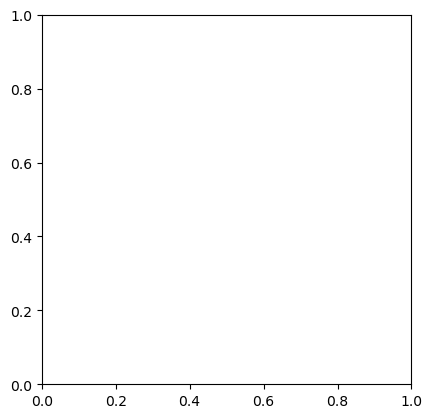

In [116]:
# see them
systems.convex_hull.plot()

In [130]:
systems_hulls=systems.convex_hull.to_frame()
systems_hulls['system']=['Colorado', 'Rio Grande, North America']
systems_hulls.rename(columns={0:'geometry'},inplace=True)
systems_hulls=systems_hulls.set_geometry('geometry')
systems_hulls.crs="EPSG:24817"
systems_hulls

,geometry,system
0,None,Colorado
1,None,"Rio Grande, North America"


In [118]:
distanceMatrixKM_sysHull_air=systems_hulls.set_index('system').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air

TypeError: (<class 'geopandas.geoseries.GeoSeries'>, <class 'NoneType'>)

In [ ]:
mins=distanceMatrixKM_sysHull_air.idxmin(axis="columns")
mins

In [ ]:
# plotting
base=systems_hulls.explore()
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

In [ ]:
# plotting
base=systems_hulls.explore()
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

In [ ]:
#EXERCISE 4

# remember:
distanceMatrixKM_riv_air

In [131]:
# getting a value (it can be any value)
distanceMatrixKM_riv_air.loc['Colorado'].min() # I chose min

101.60852676232685

In [132]:
minMts=distanceMatrixKM_riv_air.loc['Colorado'].min()*1000 # km

#the buffer is a polygon:
rivers[rivers.NAME=='Colorado'].buffer(distance = minMts)

1    POLYGON ((1212115.111 2196344.737, 1211133.268...
dtype: geometry

In [134]:
# see buffer:
bufferAroundColorado=rivers[rivers.NAME=='Colorado'].buffer(distance = minMts)
bufferAsBase=bufferAroundColorado.explore(color='red')
rivers[rivers.NAME=='Colorado'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})

In [135]:
small_airports=airports[airports['kind']=='small_airport']

# plotting
rivers[rivers.NAME=='Colorado'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
small_airports.explore(m=bufferAsBase,color='black')

In [136]:
riversWithinBuffer=small_airports.clip(mask=bufferAroundColorado)
#
riversWithinBuffer

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
1211,Golfo de Santa Clara Airport,small_airport,31.708581,-114.524374,16.0,Sonora,San Luis Río Colorado,POINT (1308505.114 2234165.701)
954,La Mesa Airport,small_airport,32.105980,-114.985030,75.0,Baja California,Mexicali,POINT (1268804.507 2282186.011)
938,Aeródromo Leona Vicario,small_airport,32.120496,-115.169902,36.0,Baja California,Mexicali,POINT (1251473.022 2285396.779)
955,Ciudad Coahuila South Airport,small_airport,32.167171,-115.003204,31.0,Baja California,Mexicali,POINT (1267704.103 2289140.482)
946,Zacatecas Airstrip,small_airport,32.165907,-115.039982,30.0,Baja California,Mexicali,POINT (1264215.493 2289316.494)
930,Mosqueda Airport,small_airport,32.163310,-115.273440,15.0,Baja California,Mexicali,POINT (1242126.810 2291057.556)
655,Sierra Juárez Airstrip,small_airport,32.131230,-116.015990,NaN,Baja California,Ensenada,POINT (1171627.184 2294189.935)
1214,La Aurora Airport,small_airport,32.236703,-115.010247,39.0,Sonora,San Luis Río Colorado,POINT (1267741.310 2296927.471)
950,Muller Airstrip,small_airport,32.253370,-115.178290,NaN,Baja California,Mexicali,POINT (1252040.400 2300232.677)
928,Melgoza Airport,small_airport,32.257159,-115.175686,38.0,Baja California,Mexicali,POINT (1252325.090 2300631.079)


In [137]:
# plotting the airports within buffer
bufferAsBase=bufferAroundColorado.explore(color='red')
rivers[rivers.NAME=='Colorado'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
riversWithinBuffer.explore(m=bufferAsBase,color='black')

In [125]:
# minimum of all the minimum by row
distanceMatrixKM_riv_air.min(axis=1).min() 

101.60852676232685

In [138]:
# using the previous value
minMinMts_5=5*distanceMatrixKM_riv_air.min(axis=1).min()*1000


allMinBuffer=rivers.buffer(distance = minMinMts_5).explore(color='red')
rivers.explore(m=allMinBuffer,color='blue',style_kwds={'weight':0.5})

In [139]:
# you see all the buffer polygons:
riversAll_buf=rivers.buffer(distance = minMinMts_5)
riversAll_buf

0    POLYGON ((1806712.127 1747400.089, 1792735.813...
1    POLYGON ((919753.803 1911942.035, 908918.979 1...
dtype: geometry

In [140]:
allRiversWithinBuffs=small_airports.clip(riversAll_buf)
allRiversWithinBuffs

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
1394,Piedra de Cal Airport,small_airport,21.566540,-98.113017,259.0,Veracruz,Tantoyucan,POINT (2900580.619 1066790.318)
1388,Isla del Toro Airstrip,small_airport,21.563367,-97.513887,10.0,Veracruz,Tamiahua,POINT (2962317.272 1068243.210)
1421,Tancholin Airport,small_airport,21.652000,-98.595500,130.0,Veracruz,Tempoal,POINT (2850643.890 1074940.008)
631,Tanchijol Airstrip,small_airport,21.725507,-98.438809,98.0,Veracruz,El Higo,POINT (2866577.834 1083428.426)
1390,Cabo Rojo Airstrip,small_airport,21.726534,-97.553566,59.0,Veracruz,Tampico El Alto,POINT (2957672.175 1086085.345)
...,...,...,...,...,...,...,...,...
936,Lazaro Cardenas Airfield,small_airport,32.592669,-115.006108,82.0,Baja California,Mexicali,POINT (1271731.482 2336472.032)
1412,La Rumorosa Airstrip,small_airport,32.525051,-116.035865,NaN,Baja California,Tecate,POINT (1174044.722 2338122.506)
1414,Rancho las Juntas Airport,small_airport,32.500270,-116.371000,NaN,Baja California,Tecate,POINT (1142212.760 2338504.087)
931,Morelos Airstrip,small_airport,32.625210,-114.885057,95.0,Baja California,Mexicali,POINT (1283458.518 2339060.780)


<Axes: >

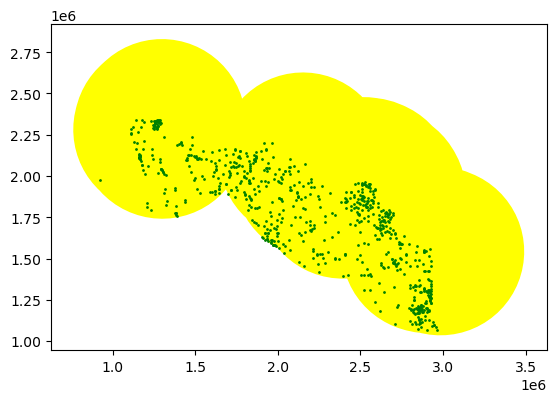

In [141]:
# simple
base=riversAll_buf.plot(color='yellow')
allRiversWithinBuffs.plot(ax=base, color='green', markersize=1)

In [142]:
# folium

base=riversAll_buf.explore(color='yellow')
allRiversWithinBuffs.explore(m=base, color='green')